# LSMS Linear Regression 
Predict farm-level yields using vegetation index measures.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns; sns.set()


In [3]:
df1 = pd.read_csv('Feb_Apr_2015_Training_Data.csv')
df1['Year'] = '2015'
df2 = pd.read_csv('Feb_Apr_2011_Training_Data.csv')
df2['Year'] = '2011'
df3 = pd.read_csv('Feb_Apr_2013_Training_Data.csv')
df3['Year'] = '2013'

In [4]:
df1.shape

(25496, 20)

In [5]:
df2.shape

(4001, 21)

In [6]:
df3.shape

(26385, 21)

In [7]:
df = df1.append(df2).append(df3)
df = df.reset_index()

/anaconda3/envs/p37/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
df.shape[0] == df1.shape[0] + df2.shape[0] + df3.shape[0]

True

In [9]:
del(df['.geo'])

In [10]:
crops_encoded = pd.get_dummies(pd.DataFrame(df['Crop Name']))
year_encoded = pd.get_dummies(pd.DataFrame(df['Year']))

In [11]:
crop_cols = list(crops_encoded.columns)

In [12]:
year_encoded.shape

(55882, 3)

In [13]:
df.shape

(55882, 21)

In [14]:
year_encoded.shape

(55882, 3)

In [15]:
df = df.merge(year_encoded, left_index=True, right_index=True)

In [16]:
df.shape

(55882, 24)

In [17]:
def gen_logs(df):
    VI_means = [i for i in list(df.columns) if 'mean' in i]

    for vi in VI_means:
        df[f"log_{vi}"] = df[vi].apply(lambda x: np.log(x))
    return df

In [18]:
df = gen_logs(df)

In [19]:
x_2015 = df[df['Year']=='2015']

In [20]:
base_x_cols = ['log_NDVI_mean', 
               'log_mean_EVI', 
               'log_TVI_mean', 
               'log_GCVI_mean', 
               #'EVI_variance', 
               #'NDVI_variance', 
               #'TVI_variance', 
              # 'GCVI_variance',
               #'NDVI_mean',
               #'EVI_mean',
               #'GCVI_mean',
               #'TVI_mean',
               'Year_2011',
               'Year_2013']#,
              # 'Year_2015']
all_x_cols = base_x_cols + crop_cols
y_col = ['Quantity (kg)']

In [21]:
df = df[y_col + base_x_cols]

print(f"There are {df.shape[0]} observations prior to removing NAs")
df = df.dropna()
print(f"There are {df.shape[0]} observations after removing NAs")

y = df[y_col]
x = df[base_x_cols]

There are 55882 observations prior to removing NAs
There are 51923 observations after removing NAs


In [22]:
y.describe()

,Quantity (kg)
count,51923.000000
mean,89.140684
std,151.080890
min,0.000000
25%,1.742000
50%,25.000000
75%,100.000000
max,1000.000000


In [23]:
x.describe()

,log_NDVI_mean,log_mean_EVI,log_TVI_mean,log_GCVI_mean,Year_2011,Year_2013
count,51923.000000,51923.000000,51923.000000,51923.000000,51923.000000,51923.000000
mean,-1.005433,-1.372607,1.906998,0.653451,0.068043,0.473432
std,0.380762,0.468059,0.528648,0.391533,0.251822,0.499298
min,-2.008290,-2.660215,0.146548,-0.380662,0.000000,0.000000
25%,-1.303619,-1.731978,1.534433,0.375186,0.000000,0.000000
50%,-0.985077,-1.307417,1.928399,0.640965,0.000000,0.000000
75%,-0.748859,-0.978203,2.228897,0.901198,0.000000,1.000000
max,-0.204386,-0.413984,3.184314,1.765379,1.000000,1.000000


In [24]:
mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          Quantity (kg)   R-squared (uncentered):                   0.278
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              3329.
Date:                Sat, 05 Oct 2019   Prob (F-statistic):                        0.00
Time:                        19:42:05   Log-Likelihood:                     -3.3352e+05
No. Observations:               51923   AIC:                                  6.671e+05
Df Residuals:                   51917   BIC:                                  6.671e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Total predicted yield in 2015 (for farms):

In [25]:
np.nanmean(res.predict(x))

89.0837156468011

Total actual yield in 2015 (for farms):

In [26]:
y.sum()['Quantity (kg)']

4628451.749343321

## Predictions

In [27]:

x_2015 = x_2015[base_x_cols]

df = pd.read_csv('Feb_Apr_2016_Forecast_Data.csv')
df['Year_2011'] = 0
df['Year_2013'] = 0
df = gen_logs(df)
x_2016 = df[base_x_cols]

df = pd.read_csv('Feb_Apr_2017_Forecast_Data.csv')
df['Year_2011'] = 0
df['Year_2013'] = 0
df = gen_logs(df)
x_2017 = df[base_x_cols]

df = pd.read_csv('Feb_Apr_2018_Forecast_Data.csv')
df['Year_2011'] = 0
df['Year_2013'] = 0
df = gen_logs(df)
x_2018 = df[base_x_cols]

In [28]:
x_2015.shape == x_2016.shape == x_2017.shape == x_2018.shape

True

In [29]:
y_15 = np.nanmean(res.predict(x_2015))

In [30]:
y_16 = np.nanmean(res.predict(x_2016))

In [31]:
y_17 = np.nanmean(res.predict(x_2017))

In [32]:
y_18 = np.nanmean(res.predict(x_2018))

In [33]:
output = {'Year': [2015, 2016, 2017, 2018], 'Predictions': [y_15, y_16, y_17, y_18]}

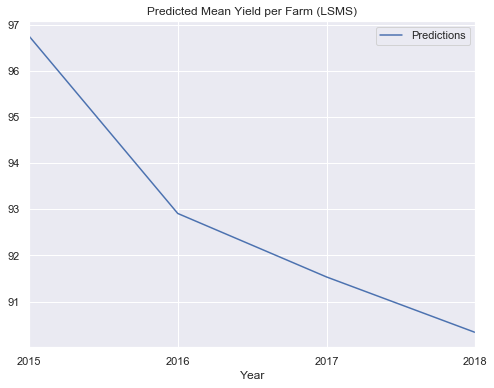

In [34]:
plt = df.from_dict(output).plot('Year','Predictions', xticks=[2015,2016,2017,2018], figsize=(8,6), title="Predicted Mean Yield per Farm (LSMS)")
plt.figure.savefig('Predictions.png',dpi=180)

In [35]:
actuals = {'Year': [2015, 2016, 2017, 2018], 
           'Actuals': [  270396048.03/ 12558444.55   ,
                       266828807.04/12486270.87 ,
                       290385593.21/12574107.33   ,
                       306126383.06/12677882.27 ]}

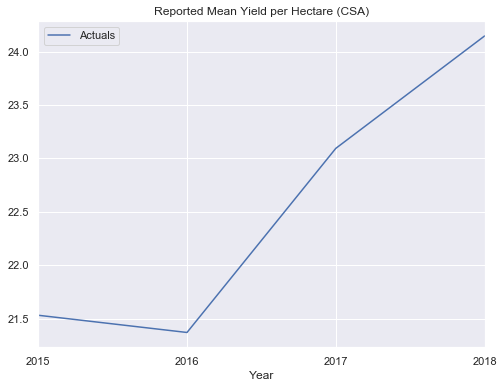

In [36]:
plt = df.from_dict(actuals).plot('Year','Actuals', xticks=[2015,2016,2017,2018], figsize=(8,6), title='Reported Mean Yield per Hectare (CSA)')
plt.figure.savefig('Actuals.png',dpi=180)